# Import modules

In [3]:
import os
import numpy as np
import scanpy as sc
import anndata
import pandas as pd
import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

import celltypist
from celltypist import models

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)

In [4]:
import session_info
session_info.show()

In [5]:
import importlib.util
import sys

spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/tissueaxis.py")
tissueaxis = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = tissueaxis
spec.loader.exec_module(tissueaxis)

In [6]:
sc.settings.set_figure_params(dpi=80,dpi_save=300)

In [7]:
%matplotlib inline

In [8]:
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk'

# Read in adata

In [9]:
# read in
adata_dir = '/nfs/team205/heart/anndata_objects/Foetal/Immune/MoMP_Aug2023'
adata = sc.read_h5ad(f'{adata_dir}/MultiVI-post_foetal_Mono-MP_withContCov-CCCov_13Mar2023_feature-select-0003.h5ad')

# get gene expression data
adata_gex = adata.uns['adata_gex_lognorm'].copy()
print(adata_gex.X.data[:5])
adata_gex

[0.9766816 0.9766816 1.7862254 2.7663608 0.9766816]


AnnData object with n_obs × n_vars = 7674 × 15922
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', 'stress_score', 'hb1_score', '_indices', '_scvi_batch', '_scvi_labels', 'fine_grain_withcycling', 't', 'seg', 'edge', 't_sd', 'milestones'
    var: 'modality', 'gene_name_scRNA-0', 'gene_id', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'adata_auc_gene', 'adata_auc_region', 'adata_gex', 'adata_gex_lognorm', 'draw_graph', 'fine_grain_colors', 'fine_g

In [10]:
adata_gex.var.head()

,modality,gene_name_scRNA-0,gene_id,n_cells
FUT8-AS1,Gene Expression,FUT8-AS1,ENSG00000276116,55
FUT8,Gene Expression,FUT8,ENSG00000033170,1093
AL139022.1,Gene Expression,AL139022.1,ENSG00000259118,68
MAX,Gene Expression,MAX,ENSG00000125952,3491
FNTB,Gene Expression,FNTB,ENSG00000257365,867


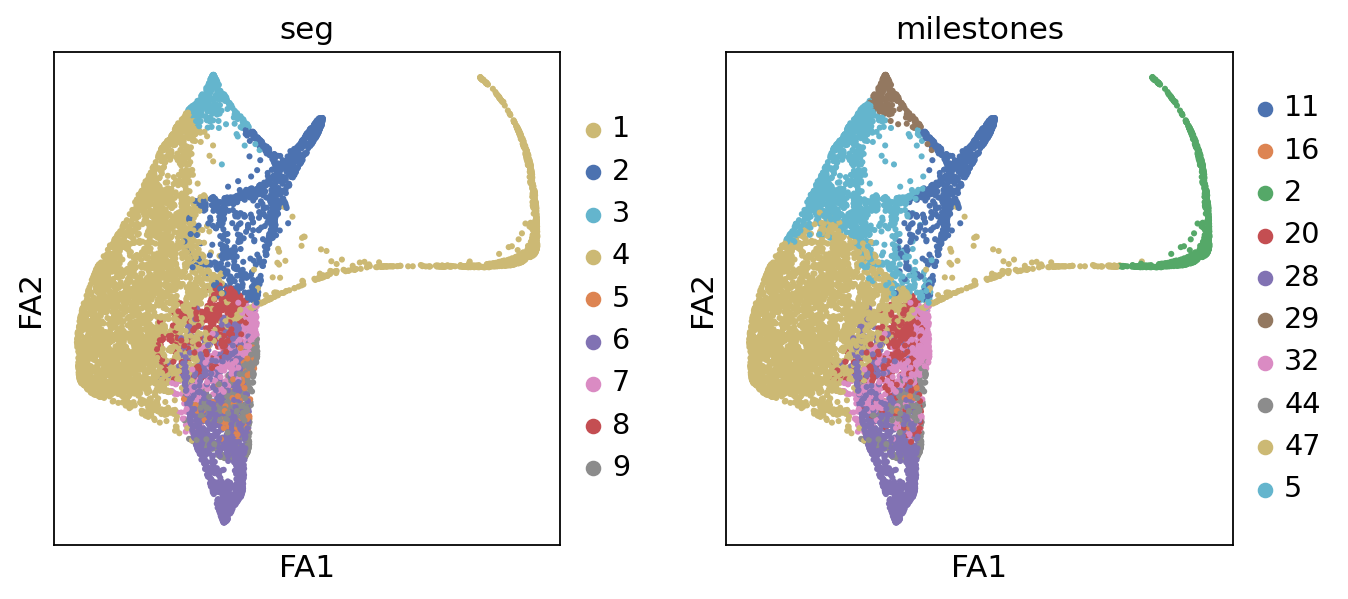

In [11]:
sc.pl.draw_graph(adata_gex,color=['seg','milestones'],cmap='RdPu',size=30)

# Subset macrophages

In [12]:
cells_to_select = ['MacrophagesATF3pos',
 'MacrophagesCX3CR1pos',
 'MacrophagesLYVE1pos',
 'MacrophagesTIMD4pos']

adata_gex = adata_gex[adata_gex.obs['fine_grain'].isin(cells_to_select)]
adata_gex.obs['fine_grain'].value_counts()

MacrophagesLYVE1pos     4939
MacrophagesATF3pos       898
MacrophagesCX3CR1pos     826
MacrophagesTIMD4pos      112
Name: fine_grain, dtype: int64

In [13]:
set(adata_gex.obs['kit_10x'])

{'5prime-v2', 'Multiome-v1'}

In [17]:
adata_gex.obs['milestones'].value_counts()

47    2762
5     1105
28     872
11     608
32     518
20     340
44     339
29     205
Name: milestones, dtype: int64

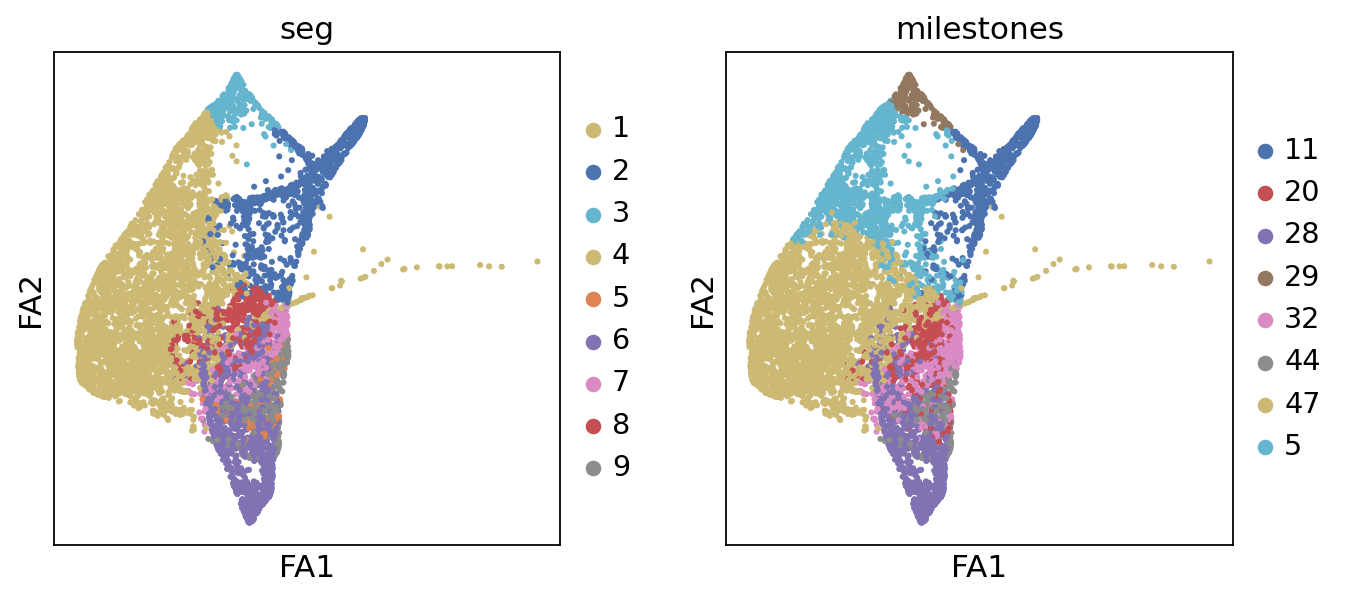

In [18]:
sc.pl.draw_graph(adata_gex,color=['seg','milestones'],cmap='RdPu',size=30)

# CellTypist prediction

In [19]:
adata_gex.X.data[:10]

array([1.7789584, 1.7789584, 1.7789584, 2.3839223, 1.7789584, 1.7789584,
       1.7789584, 2.3839223, 2.7581758, 1.7789584], dtype=float32)

🔬 Input data has 6749 cells and 15922 genes
🔗 Matching reference genes in the model
🧬 828 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 46 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'C', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'O', 'P', 'R', 'T', 'a', 'b', 'c', 'e', 'eight', 'f', 'five', 'four', 'i', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'percent', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'underscore', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 8, 11, 12, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 36, 38, 40, 41, 42, 43, 44, 47, 48, 50, 51, 53, 55, 66, 68, 69, 70, 72, 73, 76, 79, 81, 82, 83, 85, 86, 87, 92]
Closed glyph list over 'GSUB': 51 glyphs after
Glyph names: ['.notdef', '.null', 'A'

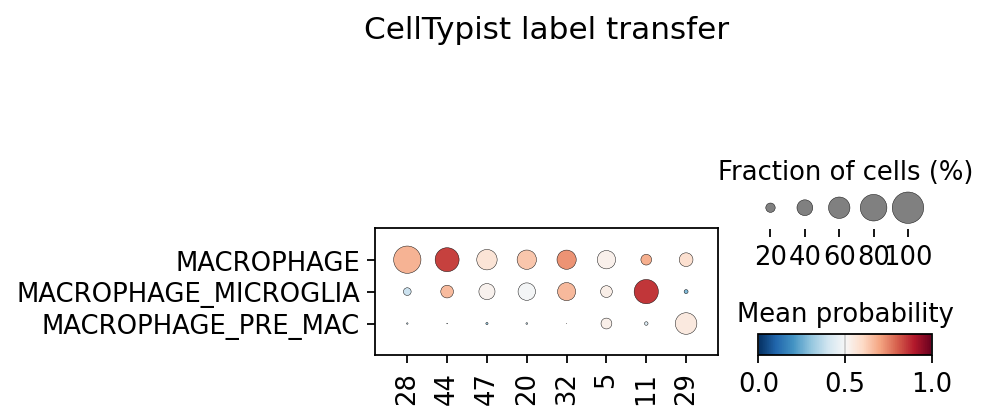

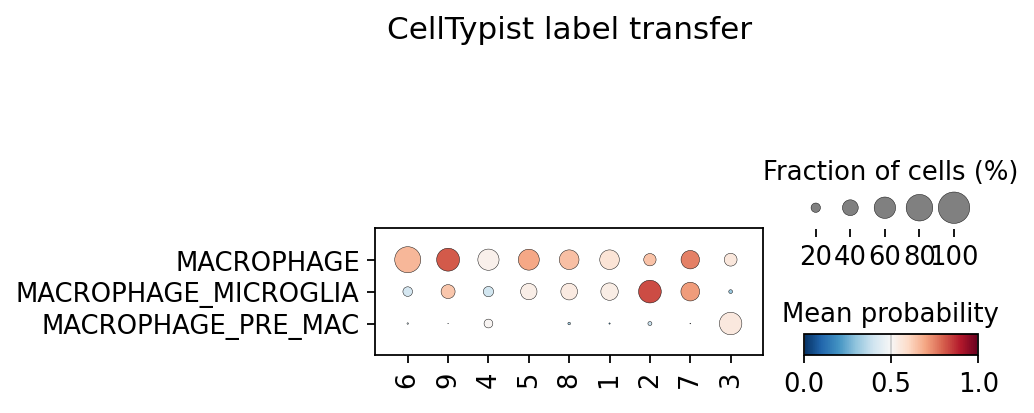

In [29]:
predictions = celltypist.annotate(adata_gex, 
                                  model = '/nfs/team205/heart/anndata_objects/Foetal/celltypist/model_YS_portal_object_20221208_onlyMP_hvg_18Nov2023.pkl', 
                                  majority_voting = False)

# plot
celltypist.dotplot(predictions, use_as_reference = 'milestones', use_as_prediction = 'predicted_labels', vmax=1, show=False)
plt.savefig(f'{figdir}/MoMP_celltypist-prediction_milestones.pdf', bbox_inches="tight",dpi=300)

celltypist.dotplot(predictions, use_as_reference = 'seg', use_as_prediction = 'predicted_labels', vmax=1)

# Plot probability on umap

In [21]:
# add probability to adata
df = predictions.probability_matrix.copy()
adata_gex.obs[df.columns] = df.copy()

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 22 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'C', 'E', 'G', 'H', 'I', 'L', 'M', 'O', 'P', 'R', 'eight', 'four', 'nonmarkingreturn', 'period', 'six', 'space', 'two', 'underscore', 'zero']
Glyph IDs:   [0, 1, 2, 3, 17, 19, 21, 23, 25, 27, 36, 38, 40, 42, 43, 44, 47, 48, 50, 51, 53, 66]
Closed glyph list over 'GSUB': 22 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'C', 'E', 'G', 'H', 'I', 'L', 'M', 'O', 'P', 'R', 'eight', 'four', 'nonmarkingreturn', 'period', 'six', 'space', 'two', 'underscore', 'zero']
Glyph IDs:   [0, 1, 2, 3, 17, 19, 21, 23, 25, 27, 36, 38, 40, 42, 43, 44, 47, 48, 50, 51, 53, 66]
Closing glyph list over 'MATH': 22 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'C', 'E', 'G', 'H', 'I', 'L', 'M', 'O', 'P', 'R', 'eight', 'four', 'nonmarkingreturn', 'period', 'six', '

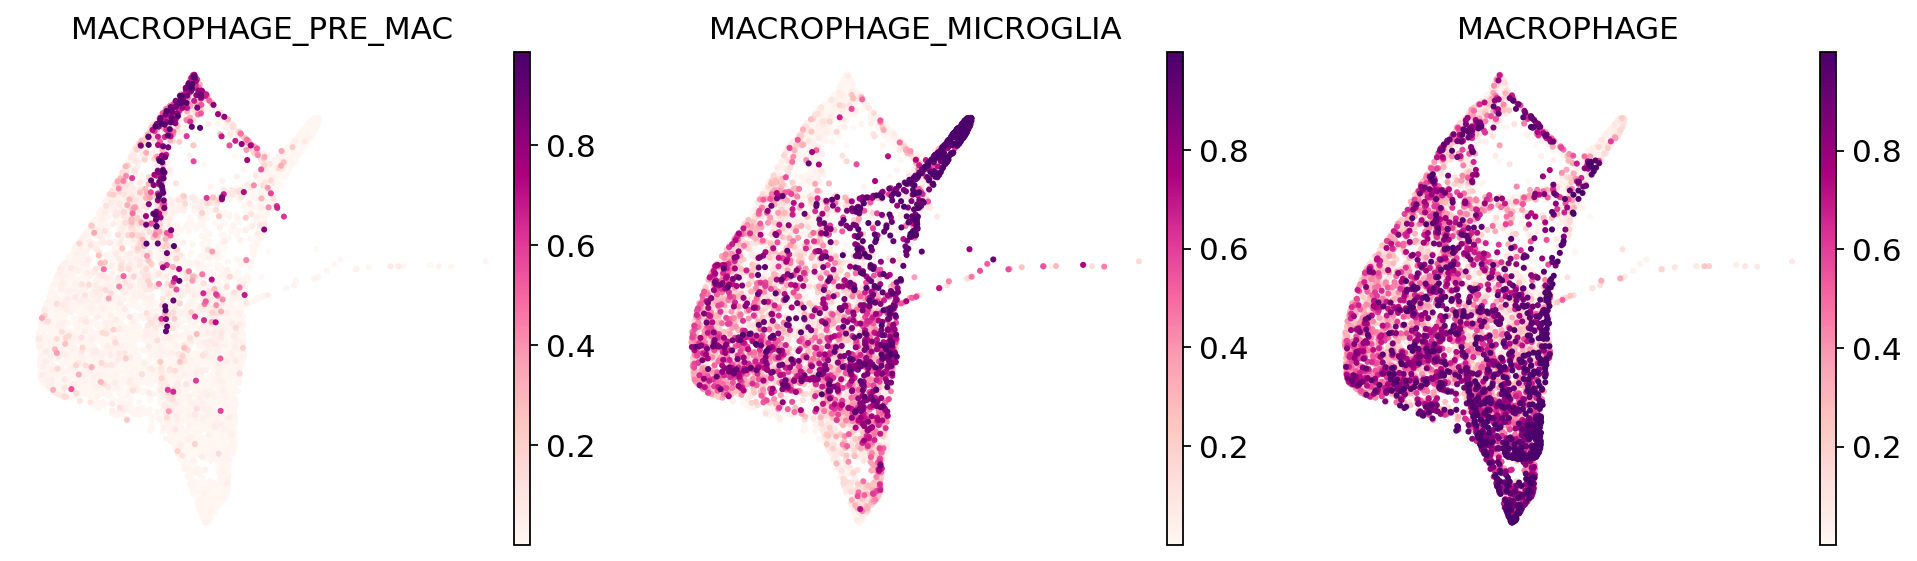

In [23]:
sc.pl.draw_graph(adata_gex,
                 color=['MACROPHAGE_PRE_MAC', 'MACROPHAGE_MICROGLIA', 'MACROPHAGE', ],
                 cmap='RdPu',size=30, show=False, frameon=False)
plt.savefig(f'{figdir}/Force-directed-graph_MoMP_YS_Mac_probability.pdf', bbox_inches="tight",dpi=300)

# Annotate YS-derived macrophage population

* milestones=='29'
* based on CellTypist prediction 

In [24]:
pd.crosstab(adata.obs['fine_grain'],adata.obs['seg'])

seg,1,2,3,4,5,6,7,8,9
fine_grain,,,,,,,,,
MonocytesMPOpos,200,1,2,0,0,1,0,0,0
Monocytes,490,4,0,0,0,0,1,0,1
MonocyteDerivedCells,172,14,0,6,0,2,2,1,2
MacrophagesCX3CR1pos,146,524,33,77,1,2,18,22,3
MacrophagesTIMD4pos,63,11,1,7,1,1,11,6,11
MacrophagesLYVE1pos,1610,247,237,1148,67,922,176,257,275
MacrophagesATF3pos,229,77,0,78,35,152,112,48,167


In [25]:
adata.obs['fine_grain_mod'] = adata.obs['fine_grain'].astype('str').copy()
obsnames = adata.obs_names[adata.obs['milestones']=='29']
adata.obs.loc[obsnames,'fine_grain_mod'] = 'MacrophagesYSderived'
adata.obs['fine_grain_mod'].value_counts()

MacrophagesLYVE1pos     4757
MacrophagesATF3pos       898
MacrophagesCX3CR1pos     804
Monocytes                496
MacrophagesYSderived     207
MonocytesMPOpos          202
MonocyteDerivedCells     199
MacrophagesTIMD4pos      111
Name: fine_grain_mod, dtype: int64

... storing 'fine_grain_mod' as categorical
maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 42 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'F', 'I', 'L', 'M', 'O', 'P', 'R', 'S', 'T', 'V', 'X', 'Y', 'a', 'c', 'd', 'e', 'f', 'four', 'g', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'three', 'underscore', 'v', 'y']
Glyph IDs:   [0, 1, 2, 3, 20, 22, 23, 36, 38, 39, 40, 41, 44, 47, 48, 50, 51, 53, 54, 55, 57, 59, 60, 66, 68, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 89, 92]
Closed glyph list over 'GSUB': 47 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'F', 'I', 'L', 'M', 'O', 'P', 'R', 'S', 'T', 'V', 'X', 'Y', 'a', 'c', 'd', 'e', 'f', 'fi', 'fl', 'four', 'g', 'h', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'r', 's', 'space', 't', 'three',

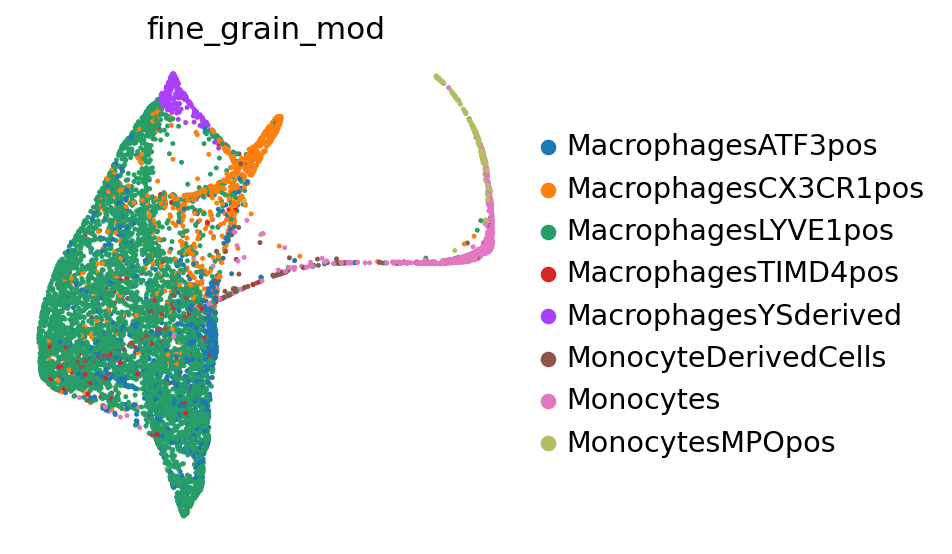

In [26]:
sc.pl.draw_graph(adata,color=['fine_grain_mod'],cmap='RdPu',size=20,
                 frameon=False, show=False
                )
plt.savefig(f'{figdir}/Force-directed-graph_MoMP_celltype_annotation.pdf', bbox_inches="tight",dpi=300)

In [19]:
# save
adata.write(f'{outdir}/MultiVI-post_foetal_Mono-MP_withContCov-CCCov_13Mar2023_feature-select-0003.h5ad')

In [20]:
f'{outdir}/MultiVI-post_foetal_Mono-MP_withContCov-CCCov_13Mar2023_feature-select-0003.h5ad'

'/nfs/team205/heart/anndata_objects/Foetal/Immune/MoMP_Aug2023/MultiVI-post_foetal_Mono-MP_withContCov-CCCov_13Mar2023_feature-select-0003.h5ad'

🔬 Input data has 6749 cells and 15922 genes
🔗 Matching reference genes in the model
🧬 828 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 53 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L', 'M', 'O', 'P', 'R', 'S', 'T', 'V', 'X', 'Y', 'a', 'b', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'h', 'i', 'l', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'percent', 'period', 'r', 's', 'six', 'space', 't', 'three', 'two', 'underscore', 'v', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 8, 11, 12, 17, 19, 20, 21, 22, 23, 24, 25, 27, 36, 38, 39, 40, 41, 42, 43, 44, 47, 48, 50, 51, 53, 54, 55, 57, 59, 60, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 81, 82, 83, 85, 86, 87, 89, 92]
Closed glyph list over 'GSUB

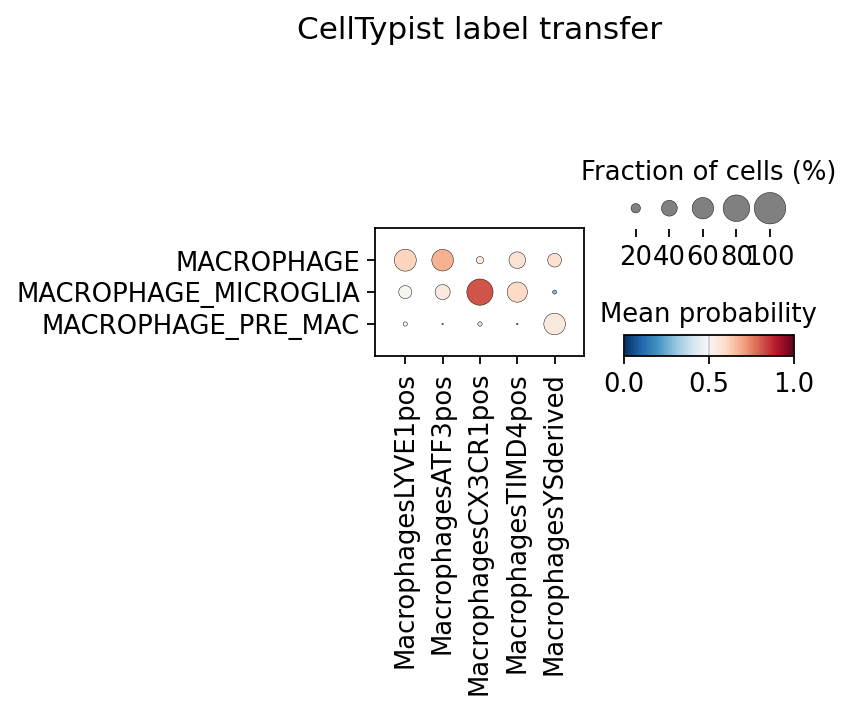

In [28]:
adata_gex.obs['fine_grain_mod'] = adata.obs['fine_grain_mod'].reindex(adata_gex.obs_names)

predictions = celltypist.annotate(adata_gex, 
                                  model = '/nfs/team205/heart/anndata_objects/Foetal/celltypist/model_YS_portal_object_20221208_onlyMP_hvg_18Nov2023.pkl', 
                                  majority_voting = False
                                 )

# plot
celltypist.dotplot(predictions, use_as_reference = 'fine_grain_mod', use_as_prediction = 'predicted_labels', vmax=1, show=False)
plt.savefig(f'{figdir}/MoMP_celltypist-prediction_celltypes.pdf', bbox_inches="tight",dpi=300)

# Plot microglia marker genes

In [30]:
# get gene expression data
ad = adata.uns['adata_gex_lognorm'].copy()
ad.obs['fine_grain_mod'] = adata.obs['fine_grain_mod'].reindex(ad.obs_names)
print(ad.X.data[:5])
ad

[0.9766816 0.9766816 1.7862254 2.7663608 0.9766816]


AnnData object with n_obs × n_vars = 7674 × 15922
    obs: 'sangerID', 'combinedID', 'donor', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'multiplexed', 'batch_key', 'region', 'FACSgate', 'sex', 'week', 'trimester', 'fine_grain', 'mid_grain', 'coarse_grain', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', 'stress_score', 'hb1_score', '_indices', '_scvi_batch', '_scvi_labels', 'fine_grain_withcycling', 't', 'seg', 'edge', 't_sd', 'milestones', 'fine_grain_mod'
    var: 'modality', 'gene_name_scRNA-0', 'gene_id', 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'adata_auc_gene', 'adata_auc_region', 'adata_gex', 'adata_gex_lognorm', 'draw_graph', 'fine_grai

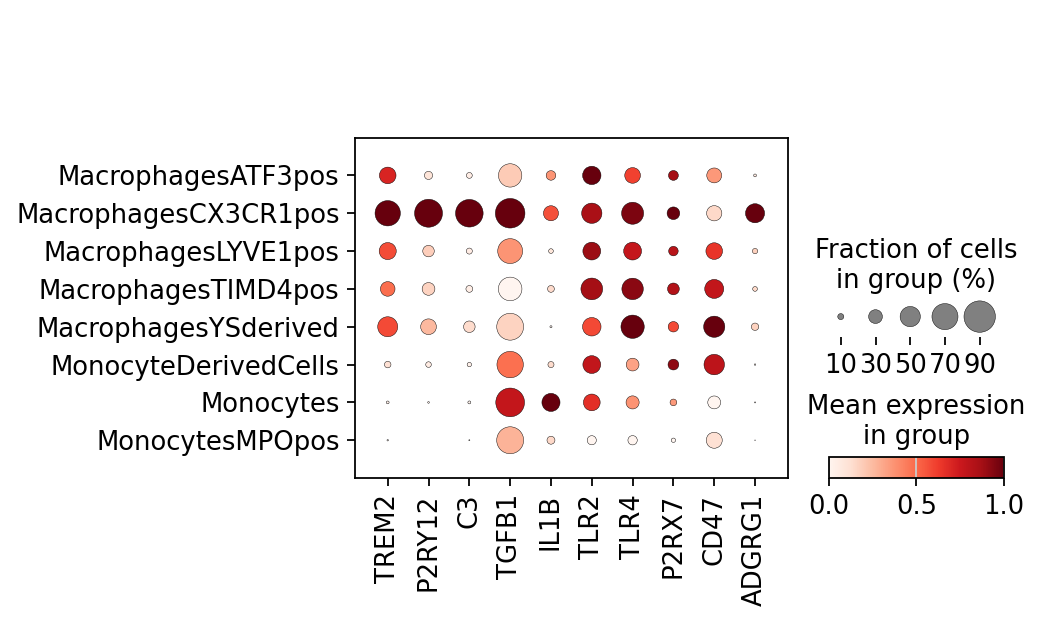

In [31]:
genes = ['CXCR1','TREM2','P2RY12','C3','TGFB1','IL1B','TLR2','TLR4','P2RX7','RAGE','CD47','ADGRG1']
genes = [x for x in genes if x in ad.var_names]

sc.pl.dotplot(ad,
              var_names=genes,
              groupby='fine_grain_mod',
              standard_scale = 'var'
             )

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'GSUB': 53 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'O', 'P', 'R', 'S', 'T', 'V', 'X', 'Y', 'a', 'c', 'd', 'e', 'f', 'five', 'four', 'g', 'h', 'i', 'l', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'percent', 'period', 'r', 's', 'seven', 'space', 't', 'three', 'two', 'u', 'v', 'x', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 8, 11, 12, 17, 19, 20, 21, 22, 23, 24, 26, 28, 36, 37, 38, 39, 40, 41, 42, 44, 47, 48, 50, 51, 53, 54, 55, 57, 59, 60, 68, 70, 71, 72, 73, 74, 75, 76, 79, 81, 82, 83, 85, 86, 87, 88, 89, 91, 92]
Closed glyph list over 'GSUB': 58 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'O', 'P', 'R', 'S', 'T', 'V', 'X', 'Y', 'a', 'c', 'd', 'e', 'f', 'fi', 'five', 'fl', '

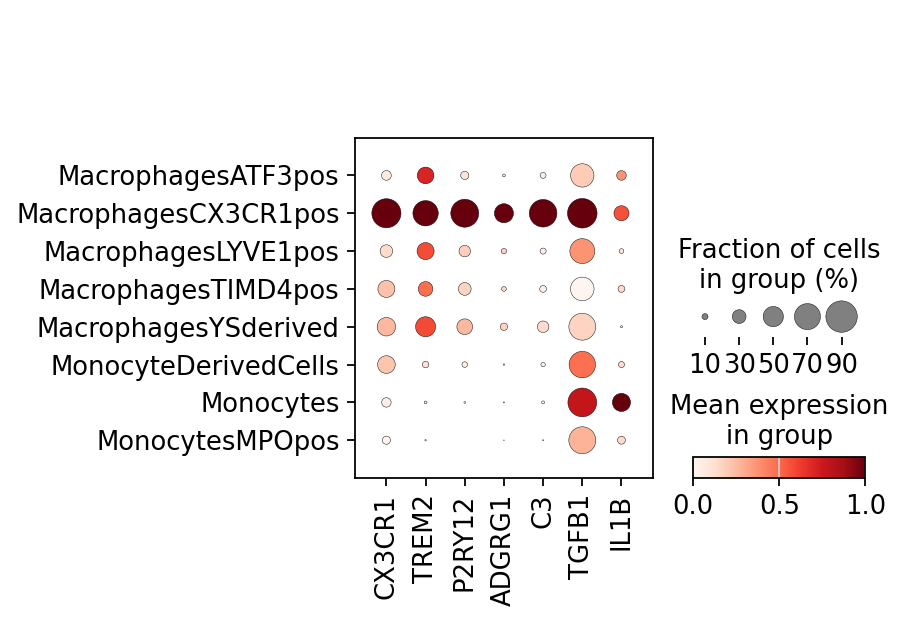

In [32]:
genes = ['CX3CR1','TREM2','P2RY12','ADGRG1','C3','TGFB1','IL1B']
genes = [x for x in genes if x in ad.var_names]

sc.pl.dotplot(ad,
              var_names=genes,
              groupby='fine_grain_mod',
              standard_scale = 'var',
              show=False
             )
plt.savefig(f'{figdir}/MoMP_microglia-markers_dotplot.pdf', bbox_inches="tight",dpi=300)